In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import scipy.stats as st
import numpy as np
import requests



In [2]:
file_path = "Resources\\MoviesOnStreamingPlatforms_updated.csv"

df = pd.read_csv(file_path)

df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [3]:
df.drop(columns=["Rotten Tomatoes","Directors","Type","Unnamed: 0"], inplace=True)

df.head()

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,1,0,0,0,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,1,0,0,0,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Western,"Italy,Spain,West Germany",Italian,161.0


In [4]:
complete_df = df.loc[~((df['IMDb'].isnull() )|(df['Genres'].isnull())|(df['Language'].isnull())|(df["Country"].isnull())|(df['Age'].isnull()))]

complete_df.shape

(7192, 13)

In [5]:
#CREA UNA COPIA DEL DATAFRAME

In [6]:
platforms=complete_df.copy()

In [7]:
#AGREGA UNA NUEVA COLUMNA LLAMADA PLATFORMS DONDE MUESTRA EN CUANTAS PLATAFORMAS ESTÁ LA PELÍCULA

In [8]:
platforms["Platforms"]=platforms["Netflix"]+platforms["Hulu"]+platforms["Prime Video"]+platforms["Disney+"]

In [9]:
platforms.head()

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Genres,Country,Language,Runtime,Platforms
0,1,Inception,2010,13+,8.8,1,0,0,0,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,1
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Action,Sci-Fi",United States,English,136.0,1
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Action,Adventure,Sci-Fi",United States,English,149.0,1
3,4,Back to the Future,1985,7+,8.5,1,0,0,0,"Adventure,Comedy,Sci-Fi",United States,English,116.0,1
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,1,0,1,0,Western,"Italy,Spain,West Germany",Italian,161.0,2


In [10]:
#REVISA CUALES PELICULAS ESTÁN EN SOLO UNA PLATAFORMA

In [11]:
uniquePlatform=platforms["Platforms"]==1

In [12]:
#MUESTRA EL RESULTADO

In [13]:
uniquePlatform

0         True
1         True
2         True
3         True
4        False
         ...  
16726     True
16727     True
16737     True
16738     True
16740     True
Name: Platforms, Length: 7192, dtype: bool

In [14]:
#METE LA VALIDACION AL DATAFRAME PARA QUEDARSE SOLO CON LAS PELICULAS QUE ESTÁN UNA SOLA PLATAFORMA

In [15]:
uniqueDF=platforms[uniquePlatform]

In [16]:
#MUESTRA EL RESULTADO

In [17]:
uniqueDF.head()

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Genres,Country,Language,Runtime,Platforms
0,1,Inception,2010,13+,8.8,1,0,0,0,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,1
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Action,Sci-Fi",United States,English,136.0,1
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Action,Adventure,Sci-Fi",United States,English,149.0,1
3,4,Back to the Future,1985,7+,8.5,1,0,0,0,"Adventure,Comedy,Sci-Fi",United States,English,116.0,1
5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,1,0,0,0,"Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0,1


In [18]:
#SUMA PARA CADA PLATAFORMA CUANTOS UNIQUEOS TIENE

In [19]:
Netflix=uniqueDF["Netflix"].sum()
Netflix

1450

In [20]:
Hulu=uniqueDF["Hulu"].sum()
Hulu

381

In [21]:
Prime=uniqueDF["Prime Video"].sum()
Prime

4508

In [22]:
Disney=uniqueDF["Disney+"].sum()
Disney

472

In [23]:
Total=uniqueDF["Platforms"].sum()
Total

6811

In [24]:
#SHAPE PARA REVISAR QUE EL TOTAL DE CON EL TAMAÑO DE LA TABLA

In [25]:
uniqueDF.shape

(6811, 14)

In [26]:
#CREAS DATAFRAME PARA METER LOS DATOS DE LAS SUMAS

In [27]:
uniqueSum={'Platform':  ['Netflix', 'Hulu', 'PrimeVideo','Disney+'],
        'TotalUniqueContent': [Netflix,Hulu,Prime,Disney]
        }
uniqueSumDf = pd.DataFrame(uniqueSum, columns = ['Platform', 'TotalUniqueContent'],index=uniqueSum['Platform'])

In [28]:
uniqueSumDf

,Platform,TotalUniqueContent
Netflix,Netflix,1450
Hulu,Hulu,381
PrimeVideo,PrimeVideo,4508
Disney+,Disney+,472


In [29]:
#GRAFICAS LAS SUMAS

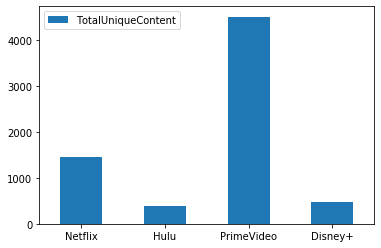

In [47]:
ax = uniqueSumDf.plot.bar(rot=0)



In [31]:
#GENERO

In [32]:
uniqueDF.head()

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Genres,Country,Language,Runtime,Platforms
0,1,Inception,2010,13+,8.8,1,0,0,0,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,1
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Action,Sci-Fi",United States,English,136.0,1
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Action,Adventure,Sci-Fi",United States,English,149.0,1
3,4,Back to the Future,1985,7+,8.5,1,0,0,0,"Adventure,Comedy,Sci-Fi",United States,English,116.0,1
5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,1,0,0,0,"Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0,1


In [33]:
#SEPARAR POR GENERO

In [34]:
#NETFLIX
onlyNetflix=uniqueDF["Netflix"]==1
onlyNetflixDf=uniqueDF[onlyNetflix]
#HULU
onlyHulu=uniqueDF["Hulu"]==1
onlyHuluDf=uniqueDF[onlyHulu]
#PRIME VIDEO
onlyPrime=uniqueDF["Prime Video"]==1
onlyPrimeDf=uniqueDF[onlyPrime]
#DISNEY+
onlyDisney=uniqueDF["Disney+"]==1
onlyDisneyDf=uniqueDF[onlyDisney]


In [35]:
#MOSTRAR INFO (EN ESTE CASO PRIME)

In [36]:
onlyPrimeDf.head()

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Genres,Country,Language,Runtime,Platforms
4439,4440,It's a Wonderful Life,1946,7+,8.6,0,0,1,0,"Drama,Family,Fantasy",United States,"English,French",130.0,1
4440,4441,Downfall,2004,18+,8.2,0,0,1,0,"Biography,Drama,History,War","Germany,Austria,Italy","French,English,German,Russian",156.0,1
4442,4443,Airplane!,1980,7+,7.7,0,0,1,0,Comedy,United States,English,88.0,1
4445,4446,Rosemary's Baby,1968,18+,8.0,0,0,1,0,"Drama,Horror",United States,English,137.0,1
4446,4447,Amores Perros,2000,18+,8.1,0,0,1,0,"Drama,Thriller",Mexico,Spanish,154.0,1


In [37]:
#SEPARA TODOS LOS GENEROS POR ","

In [69]:
#NETFLIX
genresNetflix = pd.DataFrame(onlyNetflixDf.Genres.str.split(',', expand=True).stack(), columns= ['genre'])  
genresNetflix = genresNetflix.reset_index(drop = True)  

#HULU
genresHulu = pd.DataFrame(onlyHuluDf.Genres.str.split(',', expand=True).stack(), columns= ['genre'])  
genresHulu = genresHulu.reset_index(drop = True)  

#PRIME
genresPrime = pd.DataFrame(onlyPrimeDf.Genres.str.split(',', expand=True).stack(), columns= ['genre'])  
genresPrime = genresPrime.reset_index(drop = True)  

#DISNEY
genresDisney = pd.DataFrame(onlyDisneyDf.Genres.str.split(',', expand=True).stack(), columns= ['genre'])  
genresDisney = genresDisney.reset_index(drop = True)

#TOTAL
genresTotal = pd.DataFrame(uniqueDF.Genres.str.split(',', expand=True).stack(), columns= ['genre'])  
genresTotal = genresTotal.reset_index(drop = True)

In [91]:
#MUESTRA RESULTADOS

genresTotal

,genre
0,Action
1,Adventure
2,Sci-Fi
3,Thriller
4,Action
...,...
17909,Adventure
17910,Family
17911,Comedy
17912,Family


In [92]:
#CUENTA LOS GENEROS Y LOS AGRUPA

In [94]:
#NETFLIX
genre_count_Netflix = pd.DataFrame(genresNetflix.groupby(by = ['genre']).size(),columns = ['count'])  
genre_count_Netflix.sort_values(by="count",ascending=False)
 

#HULU
genre_count_Hulu = pd.DataFrame(genresHulu.groupby(by = ['genre']).size(),columns = ['count'])  
genre_count_Hulu.sort_values(by="count",ascending=False)

#PRIME
genre_count_Prime = pd.DataFrame(genresPrime.groupby(by = ['genre']).size(),columns = ['count'])  
genre_count_Prime.sort_values(by="count",ascending=False)

#DISNEY
genre_count_Disney = pd.DataFrame(genresDisney.groupby(by = ['genre']).size(),columns = ['count'])  
genre_count_Disney.sort_values(by="count",ascending=False)

#Total
genre_count_Total = pd.DataFrame(genresTotal.groupby(by = ['genre']).size(),columns = ['count'])  
genre_count_Total.sort_values(by="count",ascending=False)

df_merge=pd.merge(genre_count_Total,genre_count_Netflix,on="genre",how="outer", suffixes=("_Total","_Netflix"))
df_merge2=pd.merge(df_merge,genre_count_Hulu,on="genre",how="outer",suffixes=("_1","_Hulu"))
df_merge3=pd.merge(df_merge2,genre_count_Prime,on="genre",how="outer")
df_merge4=pd.merge(df_merge3,genre_count_Disney,on="genre",how="outer")
df_merge4.sort_values(by="count_Total",ascending=False)

,count_Total,count_Netflix,count_x,count_y,count
genre,,,,,
Drama,3119,662.0,190.0,2131,136.0
Comedy,2191,589.0,126.0,1217,259.0
Thriller,1655,337.0,85.0,1220,13.0
Action,1353,313.0,56.0,908,76.0
Horror,1035,140.0,38.0,849,8.0
Romance,1003,268.0,65.0,604,66.0
Adventure,975,211.0,58.0,476,230.0
Family,946,182.0,68.0,307,389.0
Crime,870,176.0,50.0,621,23.0


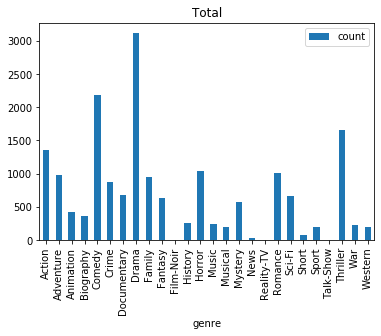

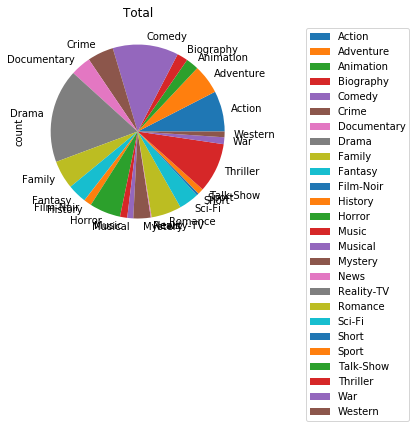

In [95]:
TotalPlot = genre_count_Total.plot.bar(rot=90)
plt.title("Total")
TotalPlot = genre_count_Total.plot.pie(subplots=True)
plt.title("Total")
plt.legend(bbox_to_anchor=(1.25,1),loc="upper left")

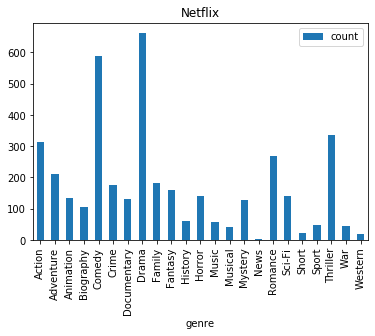

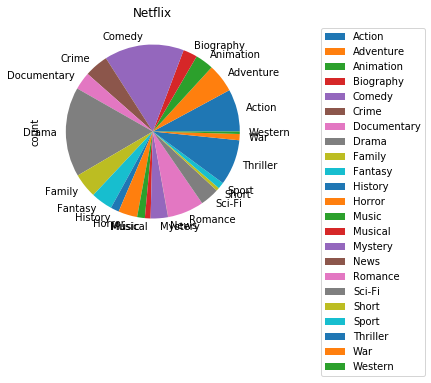

In [74]:
netflixPlot = genre_count_Netflix.plot.bar(rot=90)
plt.title("Netflix")
netflixPlot = genre_count_Netflix.plot.pie(subplots=True)
plt.title("Netflix")
plt.legend(bbox_to_anchor=(1.25,1),loc="upper left")


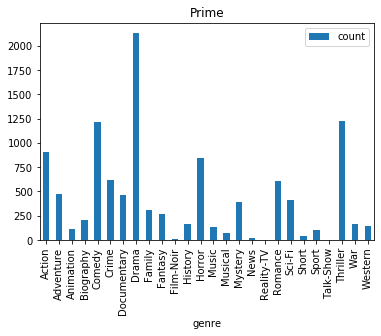

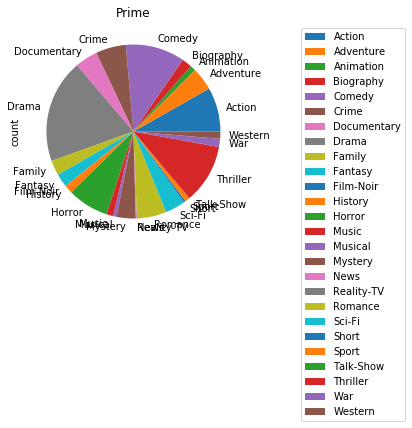

In [75]:
primePlot = genre_count_Prime.plot.bar(rot=90)
plt.title("Prime")
primePlot = genre_count_Prime.plot.pie(subplots=True)
plt.title("Prime")
plt.legend(bbox_to_anchor=(1.25,1),loc="upper left")

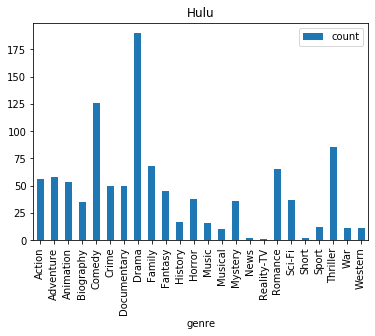

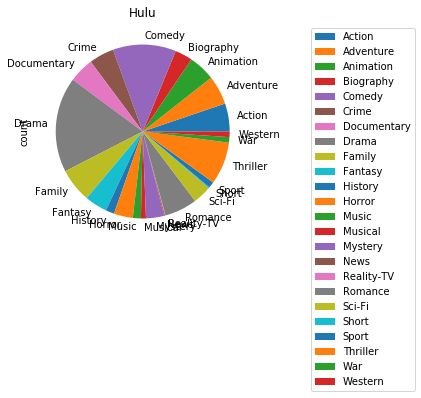

In [76]:
huluPlot = genre_count_Hulu.plot.bar(rot=90)
plt.title("Hulu")
huluPlot = genre_count_Hulu.plot.pie(subplots=True)
plt.title("Hulu")
plt.legend(bbox_to_anchor=(1.25,1),loc="upper left")

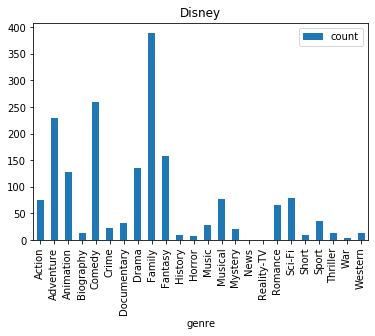

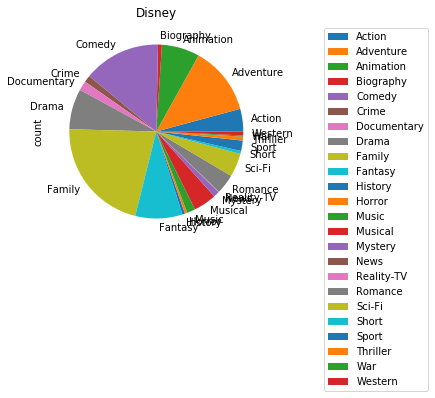

In [77]:
disneyPlot = genre_count_Disney.plot.bar(rot=90)
plt.title("Disney")
disneyPlot = genre_count_Disney.plot.pie(subplots=True)
plt.title("Disney")
plt.legend(bbox_to_anchor=(1.25,1),loc="upper left")